In [1]:
from github import Github, Auth
from secret import GH_CREDS
import re
import filetype
import requests
import yaml
from IPython import display

### Authorisation and repo/issue retrieval

`GH_CREDS` is a fine-grained personal access token defined in `secret.py`

In [2]:
auth = Auth.Token(GH_CREDS)

In [3]:
g = Github(auth=auth)

In [4]:
g.get_user().login

'hvidy'

In [5]:
repo = g.get_repo('Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas')

In [6]:
repo.name

'PIPE-4002-EarthByte-ModelAtlas'

In [7]:
issue = repo.get_issue(number=16)

In [8]:
issue.title

'M@TE Model Request: <image test>'

Will need to generate a slug for the uploaded issue. For now, just grab the name from the issue title, but these will have to be unique so this won't be sufficient. Ersilla have a script for this, where they just use "eos" + four random numbers/lowercase letters, checking to make sure it doesn't already exist.

In [9]:
slug = re.search(r"\<(?P<title>.*?)\>", issue.title).group('title').replace(" ","_")

In [10]:
slug

'image_test'

In [11]:
issue.body

"### Title\n\nTesting upload of images\n\n### Abstract\n\n![fig1](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/7ffad678-df7b-4c6b-ba87-282e2e956afd)\r\n![animation_25](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/6bba3eca-9da7-48ac-a034-0aea5c9ff8d1)\r\n\n\n### Keywords\n\n1.\r\n2.\r\n3.\r\n...\r\n\n\n### Field of Research (FoR) Codes\n\n370602: Electrial and electromagnetic methods in geophysics, 370606: Gravimetrics\n\n### Metadata Tags\n\n- [ ] published study\n- [ ] community benchmark\n- [ ] attempted reproduction of a previous model (including with different codes, etc.)\n- [X] missing data model (input files available, requires re-running by community)\n\n### Software Framework\n\n_No response_\n\n### Software Version\n\n_No response_\n\n### Source Code\n\n_No response_\n\n### Input Datasets\n\n_No response_\n\n### Computer Details\n\n_No response_\n\n### Additional Notes\n\n![FranzMarc_BlueH

In [12]:
print(issue.body)

### Title

Testing upload of images

### Abstract

![fig1](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/7ffad678-df7b-4c6b-ba87-282e2e956afd)
![animation_25](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/6bba3eca-9da7-48ac-a034-0aea5c9ff8d1)


### Keywords

1.
2.
3.
...


### Field of Research (FoR) Codes

370602: Electrial and electromagnetic methods in geophysics, 370606: Gravimetrics

### Metadata Tags

- [ ] published study
- [ ] community benchmark
- [ ] attempted reproduction of a previous model (including with different codes, etc.)
- [X] missing data model (input files available, requires re-running by community)

### Software Framework

_No response_

### Software Version

_No response_

### Source Code

_No response_

### Input Datasets

_No response_

### Computer Details

_No response_

### Additional Notes

![FranzMarc_BlueHorse](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthB

## Parsing issue body

In [13]:
regex = r"### *(?P<key>.*?)\s*[\r\n]+(?P<value>[\s\S]*?)(?=###|$)"

In [14]:
matches = re.findall(regex, issue.body)

In [15]:
matches

[('Title', 'Testing upload of images\n\n'),
 ('Abstract',
  '![fig1](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/7ffad678-df7b-4c6b-ba87-282e2e956afd)\r\n![animation_25](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/6bba3eca-9da7-48ac-a034-0aea5c9ff8d1)\r\n\n\n'),
 ('Keywords', '1.\r\n2.\r\n3.\r\n...\r\n\n\n'),
 ('Field of Research (FoR) Codes',
  '370602: Electrial and electromagnetic methods in geophysics, 370606: Gravimetrics\n\n'),
 ('Metadata Tags',
  '- [ ] published study\n- [ ] community benchmark\n- [ ] attempted reproduction of a previous model (including with different codes, etc.)\n- [X] missing data model (input files available, requires re-running by community)\n\n'),
 ('Software Framework', '_No response_\n\n'),
 ('Software Version', '_No response_\n\n'),
 ('Source Code', '_No response_\n\n'),
 ('Input Datasets', '_No response_\n\n'),
 ('Computer Details', '_No response_\n\n'),
 ('Add

In [16]:
data = dict(matches)
data

{'Title': 'Testing upload of images\n\n',
 'Abstract': '![fig1](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/7ffad678-df7b-4c6b-ba87-282e2e956afd)\r\n![animation_25](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/6bba3eca-9da7-48ac-a034-0aea5c9ff8d1)\r\n\n\n',
 'Keywords': '1.\r\n2.\r\n3.\r\n...\r\n\n\n',
 'Field of Research (FoR) Codes': '370602: Electrial and electromagnetic methods in geophysics, 370606: Gravimetrics\n\n',
 'Metadata Tags': '- [ ] this submission includes model output data\n\n',
 'Software Framework': '_No response_\n\n',
 'Software Version': '_No response_\n\n',
 'Source Code': '_No response_\n\n',
 'Input Datasets': '_No response_\n\n',
 'Computer Details': '_No response_\n\n',
 'Additional Notes': '![user-secret-solid](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/08bec3ba-51e2-4ee9-aa05-80322cd90ec4)\r\n\n\n',
 'File Description': 'Fil

## Testing crosswalking dictionary to a template yaml file

In [17]:
with open('template.yml', 'r') as template_file:
    template = yaml.load(template_file, Loader=yaml.FullLoader)

In [18]:
template

{'templateKey': 'model',
 'slug': 'placeholder_slug',
 'title': 'placeholder_title',
 'date': datetime.datetime(2023, 8, 28, 15, 4, 10, tzinfo=datetime.timezone.utc),
 'featuredpost': False,
 'for_codes': ['placeholder_for_code'],
 'status': 'placeholder_status',
 'software': 'placeholder_software',
 'licence': 'placeholder_licence',
 'uploader': {'name': 'placeholder_uploader_name',
  'email': 'placeholder_uploade_email'},
 'authors': [{'name': 'placeholder_author_name',
   'email': 'placeholder_author_email',
   'orcid': 'placeholder_author_orcid'}],
 'tags': ['placeholder_tag'],
 'abstract': 'placeholder_abstract\n',
 'images': {'landing_image': {'src': 'placeholder_landing_image_src',
   'alt': 'Alt text for landing image'},
  'graphic_abstract': {'src': 'placeholder_graphic_abstract_src',
   'alt': 'Alt text for graphic abstract'},
  'model_setup': {'src': 'placeholder_model_setup_src',
   'alt': 'Alt text for model setup'}},
 'animations': [{'src': 'placeholder_animation_src',
  

In [19]:
# values not in the issue body
template['slug'] = slug
template['date'] = issue.updated_at
template['uploader']['name'] = issue.user.name
template['uploader']['email'] = issue.user.email

In [20]:
# Mapping from issue body keywords to yaml keys
mapping = {
    'Title': 'title',
    'Abstract': 'abstract',
    'Keywords': 'tags',
    'Field of Research (FoR) Codes': 'for_codes',
    'Software Framework': 'software',
    'License': 'licence'
}
# Need to turn Keywords into a list
# Need to be able to process list of authors - from ORCID
# Need to turn FoR codes into a list

In [21]:
for key in data:
    if key in mapping:
        template[mapping[key]] = data[key]

template

{'templateKey': 'model',
 'slug': 'image_test',
 'title': 'Testing upload of images\n\n',
 'date': datetime.datetime(2023, 11, 9, 7, 10, 10, tzinfo=tzutc()),
 'featuredpost': False,
 'for_codes': '370602: Electrial and electromagnetic methods in geophysics, 370606: Gravimetrics\n\n',
 'status': 'placeholder_status',
 'software': '_No response_\n\n',
 'licence': 'CC-BY-4.0',
 'uploader': {'name': 'Tim White', 'email': 'tim.white@sydney.edu.au'},
 'authors': [{'name': 'placeholder_author_name',
   'email': 'placeholder_author_email',
   'orcid': 'placeholder_author_orcid'}],
 'tags': '1.\r\n2.\r\n3.\r\n...\r\n\n\n',
 'abstract': '![fig1](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/7ffad678-df7b-4c6b-ba87-282e2e956afd)\r\n![animation_25](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/6bba3eca-9da7-48ac-a034-0aea5c9ff8d1)\r\n\n\n',
 'images': {'landing_image': {'src': 'placeholder_landing_image_src',
   

In [30]:
# Output yaml

# output_path = 'output.yaml'
# with open(output_path, 'w') as output_file:
#     yaml.dump(template, output_file, sort_keys=False)

yaml.dump(template, sort_keys=False)

'templateKey: model\nslug: image_test\ntitle: \'Testing upload of images\n\n\n  \'\ndate: 2023-11-09 07:10:10+00:00\nfeaturedpost: false\nfor_codes: \'370602: Electrial and electromagnetic methods in geophysics, 370606: Gravimetrics\n\n\n  \'\nstatus: placeholder_status\nsoftware: \'_No response_\n\n\n  \'\nlicence: CC-BY-4.0\nuploader:\n  name: Tim White\n  email: tim.white@sydney.edu.au\nauthors:\n- name: placeholder_author_name\n  email: placeholder_author_email\n  orcid: placeholder_author_orcid\ntags: "1.\\r\\n2.\\r\\n3.\\r\\n...\\r\\n\\n\\n"\nabstract: "![fig1](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/7ffad678-df7b-4c6b-ba87-282e2e956afd)\\r\\\n  \\n![animation_25](https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/6bba3eca-9da7-48ac-a034-0aea5c9ff8d1)\\r\\\n  \\n\\n\\n"\nimages:\n  landing_image:\n    src: placeholder_landing_image_src\n    alt: Alt text for landing image\n  graphic_abstract:\n

## Finding file names

The file extension of images is not included in the markdown, so they need to be inferred. We can get this using the Content-Type attribute in the http response when they are downloaded, and using the `filetype` library to assign the correct extension. Weirdly, this library doesn't natively include SVG files, so will add that in case that ever comes up. Will also need to handle errors if there are other image formats not included in the `filetype` library.

In [23]:
class Svg(filetype.Type):
    MIME = 'image/svg+xml'
    EXTENSION = 'svg'

    def __init__(self):
        super(Svg, self).__init__(
            mime = Svg.MIME,
            extension = Svg.EXTENSION
        )

    def match(self, buf):
        return False

filetype.add_type(Svg())

In [24]:
regex = r"\[(?P<filename>.*?)\]\((?P<url>.*?)\)"
file_matches = re.findall(regex, issue.body)

In [25]:
file_matches

[('fig1',
  'https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/7ffad678-df7b-4c6b-ba87-282e2e956afd'),
 ('animation_25',
  'https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/6bba3eca-9da7-48ac-a034-0aea5c9ff8d1'),
 ('FranzMarc_BlueHorse',
  'https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/f714c87c-1b0f-4bd5-b002-baffff507061'),
 ('user-secret-solid',
  'https://github.com/Sydney-Informatics-Hub/PIPE-4002-EarthByte-ModelAtlas/assets/16135394/08bec3ba-51e2-4ee9-aa05-80322cd90ec4')]

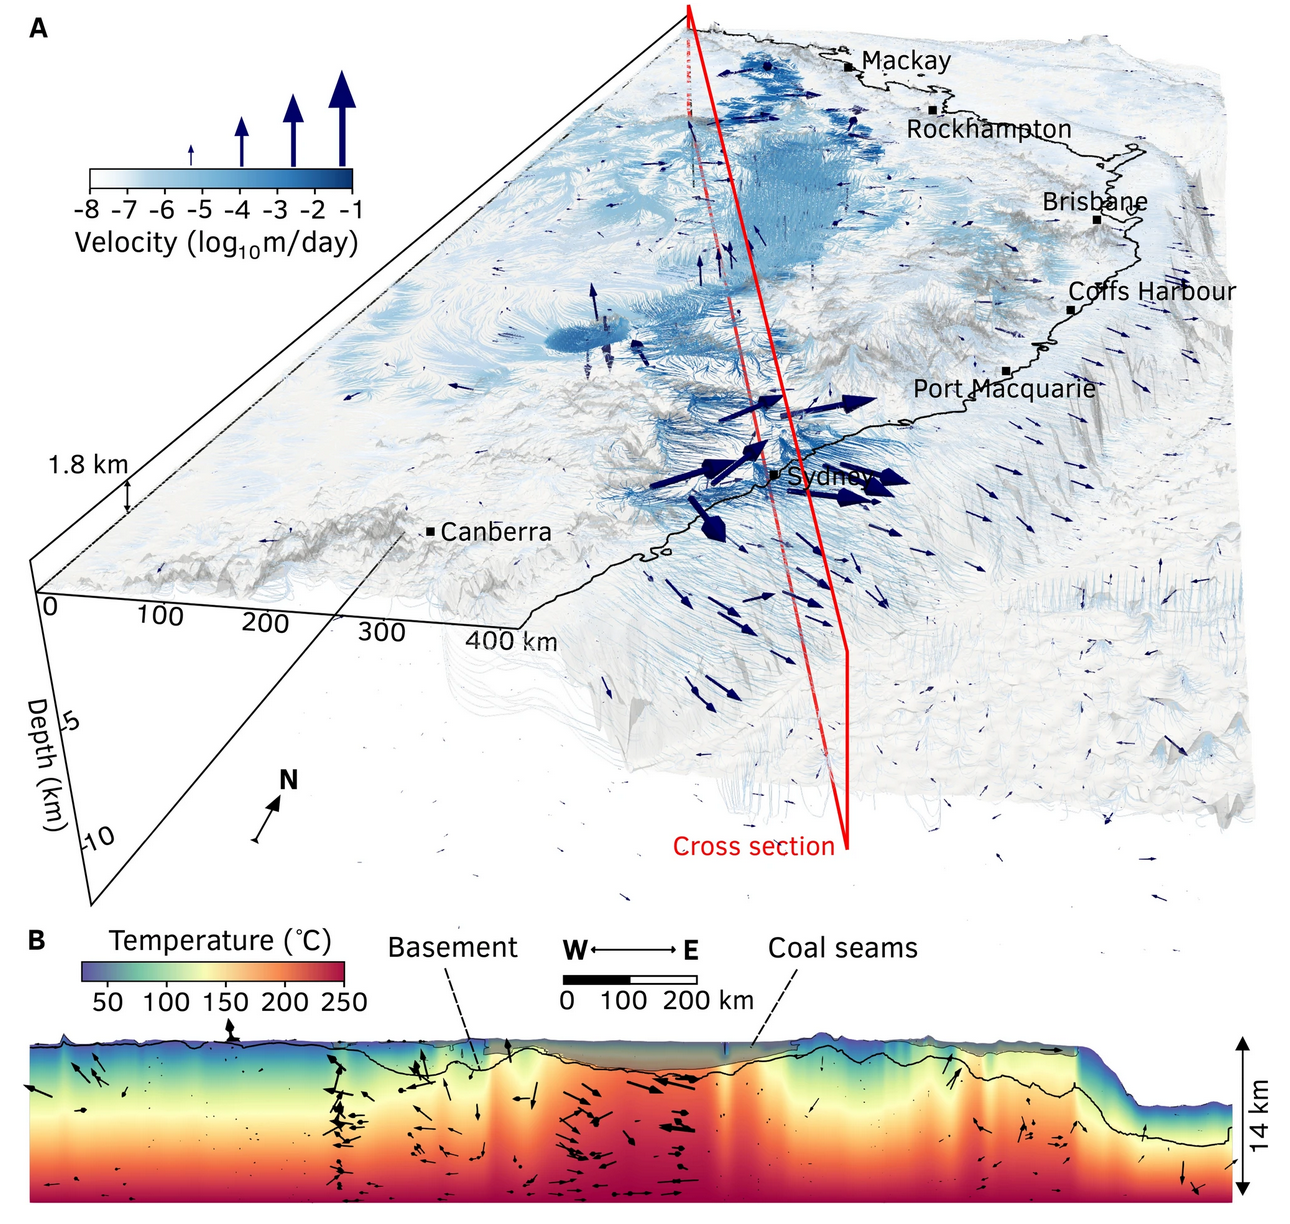

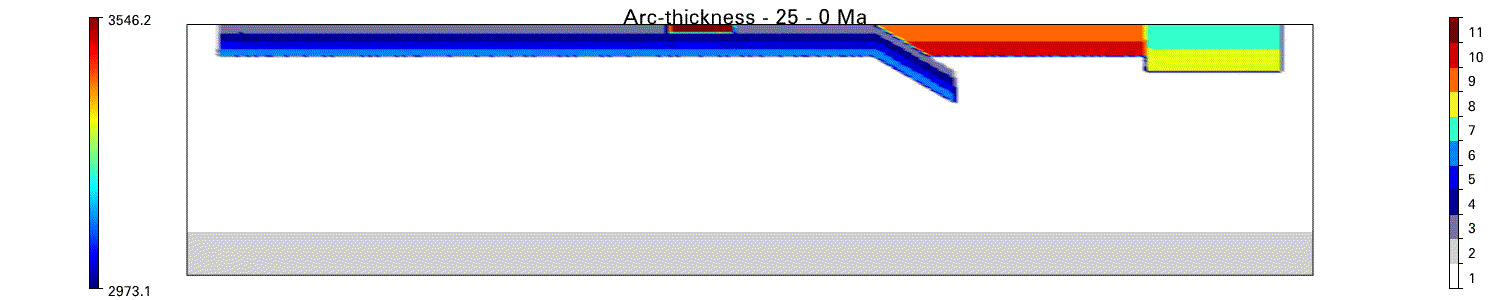

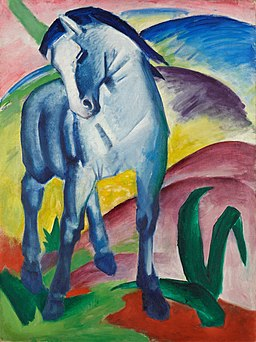

In [26]:
filenames = []
for filename, url in file_matches:
    response = requests.get(url)

    if response.headers.get('Content-Type')[0:5] == 'image':
        filename += '.'+filetype.get_type(mime=response.headers.get('Content-Type')).extension
        display.display(display.Image(response.content))
    else:
        print(response.content)

    filenames.append(filename)

In [27]:
filenames

['fig1.png',
 'animation_25.gif',
 'FranzMarc_BlueHorse.jpg',
 'user-secret-solid.svg']

In [28]:
response.headers.get('Content-Type')

'image/svg+xml'

In [29]:
filetype.is_mime_supported(response.headers.get('Content-Type'))

True